In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.neural_network import MLPRegressor
from sklearn.feature_selection import SelectKBest,mutual_info_regression
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn import preprocessing

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout
data = pd.read_csv("https://raw.githubusercontent.com/waqil52/AI-Assignment/master/Air_Quality_Prediction/air_quality_dataset_delhi.csv")
data.head()
#first five rows of given data

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4,219.720833
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1,182.187500
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1,154.037500
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6,223.208333
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2,200.645833


Understanding column abbreviation
  

1.    T-> Average Temperature(°C)
2.   TM->Maximum temperature (°C)
3. Tm->Minimum temperature (°C)
4. SLP->Atmospheric pressure at sea level (hPa)
5.H->Average relative humidity (%)
6. VV->Average visibility (Km) 
7. V->Average wind speed (Km/h)
8.  VM->Maximum sustained wind speed (Km/h)
9. PM 2.5-> Fine particulate matter(Less is better)
     

In [ ]:
data.tail()
#last five rows of given dat

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
1088,18.1,24.0,11.2,1015.4,56.0,1.8,15.9,25.9,288.416667
1089,17.8,25.0,10.7,1015.8,54.0,2.3,9.4,22.2,256.833333
1090,13.9,24.5,11.4,1015.0,95.0,0.6,8.7,14.8,169.000000
1091,16.3,23.0,9.8,1016.9,78.0,1.1,7.4,16.5,186.041667
1092,16.3,23.4,9.0,1017.3,68.0,1.3,7.8,18.3,185.583333


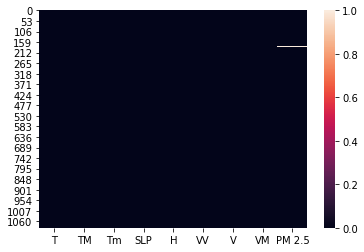

In [ ]:
sns.heatmap(data.isnull())
#checking null value in given data set

In [ ]:
data = data.dropna()
#removing null values

In [ ]:
data.describe

<bound method NDFrame.describe of          T    TM    Tm     SLP     H   VV     V    VM      PM 2.5
0      7.4   9.8   4.8  1017.6  93.0  0.5   4.3   9.4  219.720833
1      7.8  12.7   4.4  1018.5  87.0  0.6   4.4  11.1  182.187500
2      6.7  13.4   2.4  1019.4  82.0  0.6   4.8  11.1  154.037500
3      8.6  15.5   3.3  1018.7  72.0  0.8   8.1  20.6  223.208333
4     12.4  20.9   4.4  1017.3  61.0  1.3   8.7  22.2  200.645833
...    ...   ...   ...     ...   ...  ...   ...   ...         ...
1088  18.1  24.0  11.2  1015.4  56.0  1.8  15.9  25.9  288.416667
1089  17.8  25.0  10.7  1015.8  54.0  2.3   9.4  22.2  256.833333
1090  13.9  24.5  11.4  1015.0  95.0  0.6   8.7  14.8  169.000000
1091  16.3  23.0   9.8  1016.9  78.0  1.1   7.4  16.5  186.041667
1092  16.3  23.4   9.0  1017.3  68.0  1.3   7.8  18.3  185.583333

[1092 rows x 9 columns]>

In [ ]:
data.columns
# these are the columns of our given dataset

Index(['T', 'TM', 'Tm', 'SLP', 'H', 'VV', 'V', 'VM', 'PM 2.5'], dtype='object')

In [ ]:
data.dtypes

T         float64
TM        float64
Tm        float64
SLP       float64
H         float64
VV        float64
V         float64
VM        float64
PM 2.5    float64
dtype: object

In [ ]:
data.count

<bound method DataFrame.count of          T    TM    Tm     SLP     H   VV     V    VM      PM 2.5
0      7.4   9.8   4.8  1017.6  93.0  0.5   4.3   9.4  219.720833
1      7.8  12.7   4.4  1018.5  87.0  0.6   4.4  11.1  182.187500
2      6.7  13.4   2.4  1019.4  82.0  0.6   4.8  11.1  154.037500
3      8.6  15.5   3.3  1018.7  72.0  0.8   8.1  20.6  223.208333
4     12.4  20.9   4.4  1017.3  61.0  1.3   8.7  22.2  200.645833
...    ...   ...   ...     ...   ...  ...   ...   ...         ...
1088  18.1  24.0  11.2  1015.4  56.0  1.8  15.9  25.9  288.416667
1089  17.8  25.0  10.7  1015.8  54.0  2.3   9.4  22.2  256.833333
1090  13.9  24.5  11.4  1015.0  95.0  0.6   8.7  14.8  169.000000
1091  16.3  23.0   9.8  1016.9  78.0  1.1   7.4  16.5  186.041667
1092  16.3  23.4   9.0  1017.3  68.0  1.3   7.8  18.3  185.583333

[1092 rows x 9 columns]>

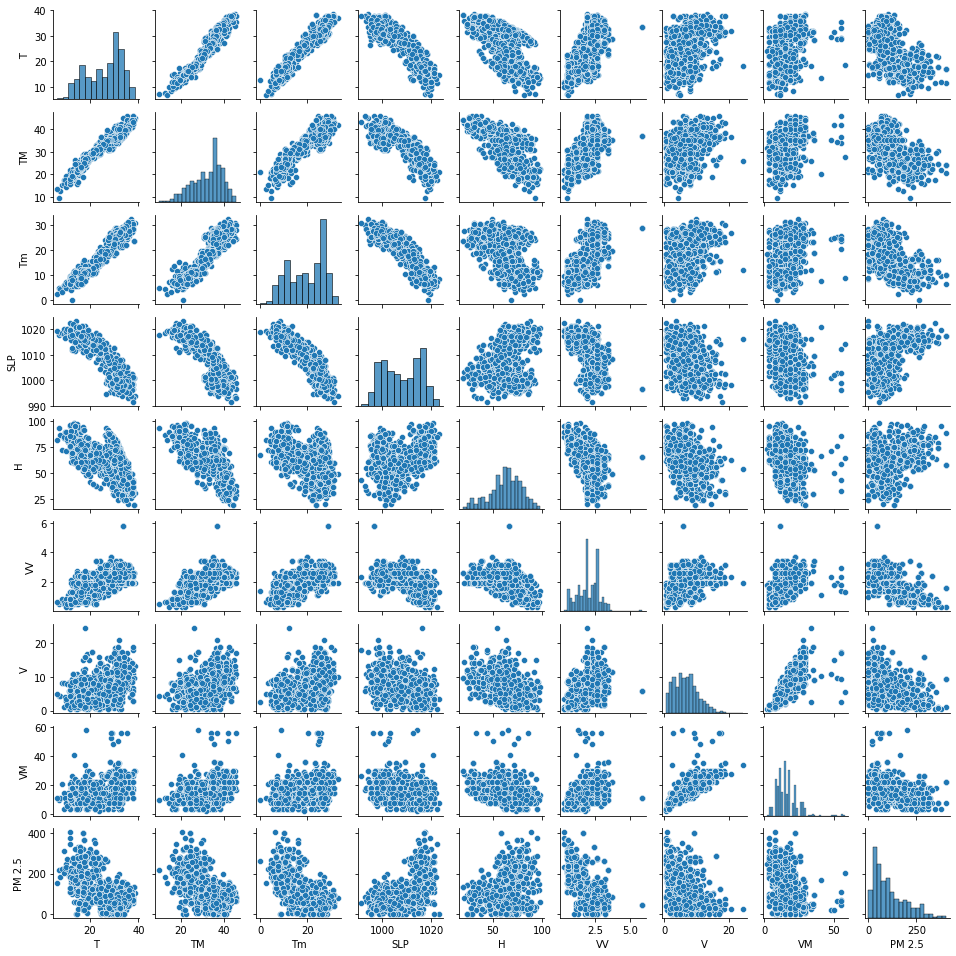

In [ ]:
sns.pairplot(data, height = 1.5)

In [ ]:
#getting all columns except PM 2.5 as independent features and PM 2.5 as dependent feature
ind_feat = data.iloc[:,:-1]
dep_feat = data.iloc[:,-1]

In [ ]:
#splitting data randomly into training and testing
X_train, X_test, Y_train, Y_test = train_test_split(ind_feat, dep_feat, test_size=0.33, random_state=0)

In [ ]:

regressor = ExtraTreesRegressor(n_estimators=600)
regressor.fit(X_train, Y_train)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=600, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

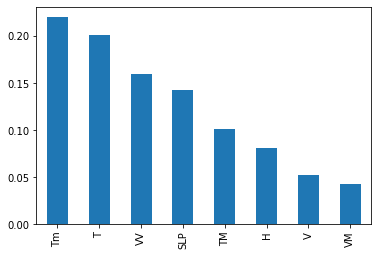

In [ ]:
#now let's find the importance of each independent feature and visualize it
feature_importances = pd.Series(regressor.feature_importances_, index=ind_feat.columns)
feature_importances.nlargest(8).plot(kind='bar')
plt.show()

Understanding column abbreviation
  

1.    T-> Average Temperature(°C)
2.   TM->Maximum temperature (°C)
3. Tm->Minimum temperature (°C)
4. SLP->Atmospheric pressure at sea level (hPa)
5.H->Average relative humidity (%)
6. VV->Average visibility (Km) 
7. V->Average wind speed (Km/h)
8.  VM->Maximum sustained wind speed (Km/h)
9. PM 2.5-> Fine particulate matter(Less is better)
     

In [ ]:
X_Best = SelectKBest(mutual_info_regression, k=8).fit_transform(ind_feat, dep_feat)
print(X_Best.shape)
X_train, X_test, Y_train, Y_test = train_test_split(X_Best, dep_feat, test_size=0.33, random_state=0)
print(regressor.score(X_test,Y_test))
cross_val_score(regressor, X_train, Y_train, cv=8)

(1092, 8)
0.8022028978865886


array([0.82231683, 0.83301323, 0.83063211, 0.80908138, 0.82494291,
       0.86962816, 0.77552771, 0.74058258])

In [ ]:
corr_matrix = data.corr()
#getting correlation matrix of every feature to determine the relation between each features
corr_matrix

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
T,1.000000,0.967536,0.953719,-0.881409,-0.509299,0.640792,0.301994,0.287738,-0.631462
TM,0.967536,1.000000,0.892031,-0.822958,-0.586681,0.606945,0.292949,0.297011,-0.568409
Tm,0.953719,0.892031,1.000000,-0.917518,-0.287357,0.577240,0.296225,0.266782,-0.673824
SLP,-0.881409,-0.822958,-0.917518,1.000000,0.240256,-0.517915,-0.329838,-0.310704,0.623187
H,-0.509299,-0.586681,-0.287357,0.240256,1.000000,-0.465374,-0.380575,-0.362177,0.138005
VV,0.640792,0.606945,0.577240,-0.517915,-0.465374,1.000000,0.376873,0.342442,-0.573941
V,0.301994,0.292949,0.296225,-0.329838,-0.380575,0.376873,1.000000,0.775655,-0.268530
VM,0.287738,0.297011,0.266782,-0.310704,-0.362177,0.342442,0.775655,1.000000,-0.215854
PM 2.5,-0.631462,-0.568409,-0.673824,0.623187,0.138005,-0.573941,-0.268530,-0.215854,1.000000


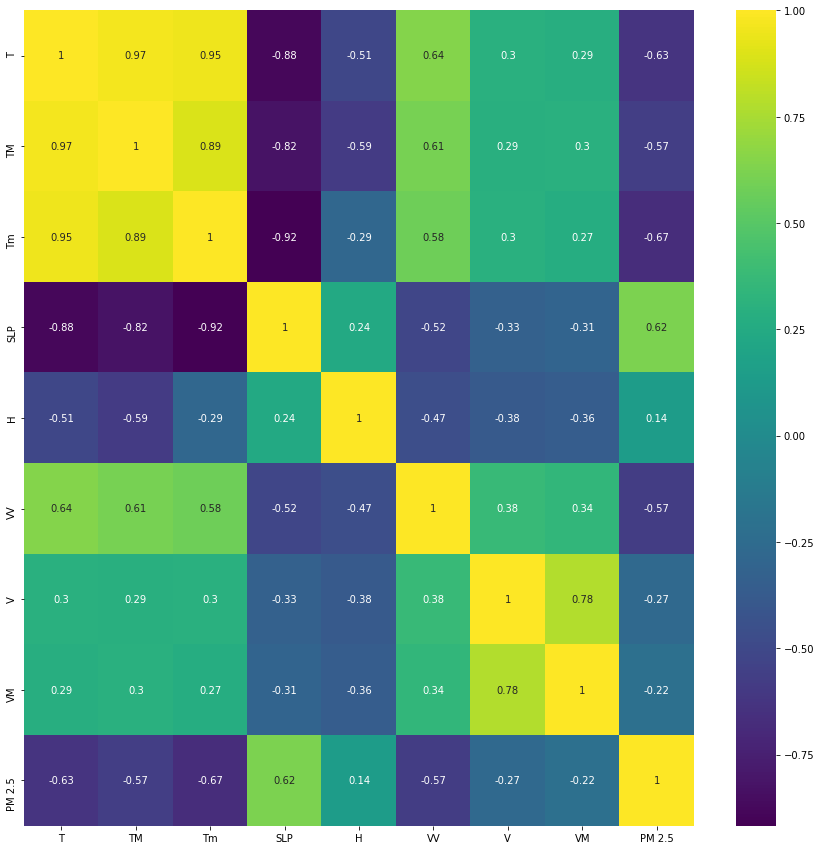

In [ ]:
corr_features = corr_matrix.index
plt.figure(figsize=(15,15))
#getting a heatmap with the correlation matrix
g=sns.heatmap(data[corr_features].corr(),annot=True,cmap="viridis")

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(ind_feat, dep_feat, test_size=0.33, random_state=0)
neuralNetworkModel = Sequential()

# The Input Layer :
neuralNetworkModel.add(Dense(128, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))

# The Hidden Layers :
neuralNetworkModel.add(Dense(256, kernel_initializer='normal',activation='relu'))
neuralNetworkModel.add(Dense(256, kernel_initializer='normal',activation='relu'))
neuralNetworkModel.add(Dense(256, kernel_initializer='normal',activation='relu'))
neuralNetworkModel.add(Dense(256, kernel_initializer='normal',activation='relu'))
neuralNetworkModel.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
neuralNetworkModel.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
neuralNetworkModel.compile(loss='mean_absolute_error', optimizer='rmsprop', metrics=['mean_absolute_error'])
neuralNetworkModel.summary()

# Fitting the ANN to the Training set
neuralNetworkModel.fit(X_train, Y_train,validation_split=0.33, batch_size = 10, epochs = 100)

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_63 (Dense)             (None, 128)               1152      
_________________________________________________________________
dense_64 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_65 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_66 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_67 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_68 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_69 (Dense)             (None, 1)                

In [138]:
prediction = neuralNetworkModel.predict(X_test)

In [139]:
#checking Mean Squared Error
metrics.mean_squared_error(Y_test, prediction)

3909.4402344590576

In [140]:
test_input = [[7.4,9.8,4.8,1017.6,93,0.5,4.3,9.4]]
actual_output = 229.7208333
test_output = neuralNetworkModel.predict(test_input)
print(actual_output)
print(test_output)

229.7208333
[[240.60555]]
